In [1]:
from seaborn import color_palette, scatterplot as scatter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from gower.gower_dist import *

In [2]:
yahoo = pd.read_csv("yahoo Finanace_industry - Stock Market.csv", index_col=0).drop("Price", axis=1)

yahoo["market cap"] = yahoo["market cap"].str.replace("B", "", regex=False).astype(float)
# yahoo["Change"] = np.log1p(yahoo["Change"] / 100)

#infer pe ratio
test_mask = yahoo.PE_ratio.isna()
yahoo["_isinferred_PE_ratio"] = test_mask
subset = yahoo[["Change", "market cap", "PE_ratio"]]
train = subset[~test_mask]
test = subset[test_mask]
reg = RandomForestRegressor(random_state=42)
X = train.drop("PE_ratio", axis=1)
y = train.PE_ratio
reg.fit(X, y)
yahoo.loc[test_mask, "PE_ratio"] = reg.predict(test.drop("PE_ratio", axis=1))
#check inference
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

yahoo.sample(10, random_state=42)

0.9981938074132708


,Name,Change,market cap,PE_ratio,_isinferred_PE_ratio
Symbol,,,,,
BLK,"BlackRock, Inc.",8.61,98.430,20.36,False
GS-PA,"The Goldman Sachs Group, Inc.",0.20,74.004,0.39,False
SCHW,The Charles Schwab Corporation,1.34,88.990,13.34,False
PGR,The Progressive Corporation,0.07,79.216,95.04,False
MS-PF,Morgan Stanley,-0.01,64.830,3.19,False
TD,The Toronto-Dominion Bank,-0.22,111.953,9.90,False
MS-PI,Morgan Stanley,-0.02,66.298,3.16,False
BML-PH,Bank of America Corporation,0.05,269.812,5.66,False
C-PJ,Citigroup Inc.,0.09,143.582,2.97,False


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

/Users/temp/gower/gower/gower_dist.py:1036: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  ax.plot(
/Users/temp/gower/gower/gower_dist.py:1058: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  ax.plot(var, df_results[col], '-gD', c=colors[i], alpha=0.4, markevery=[args[i]])


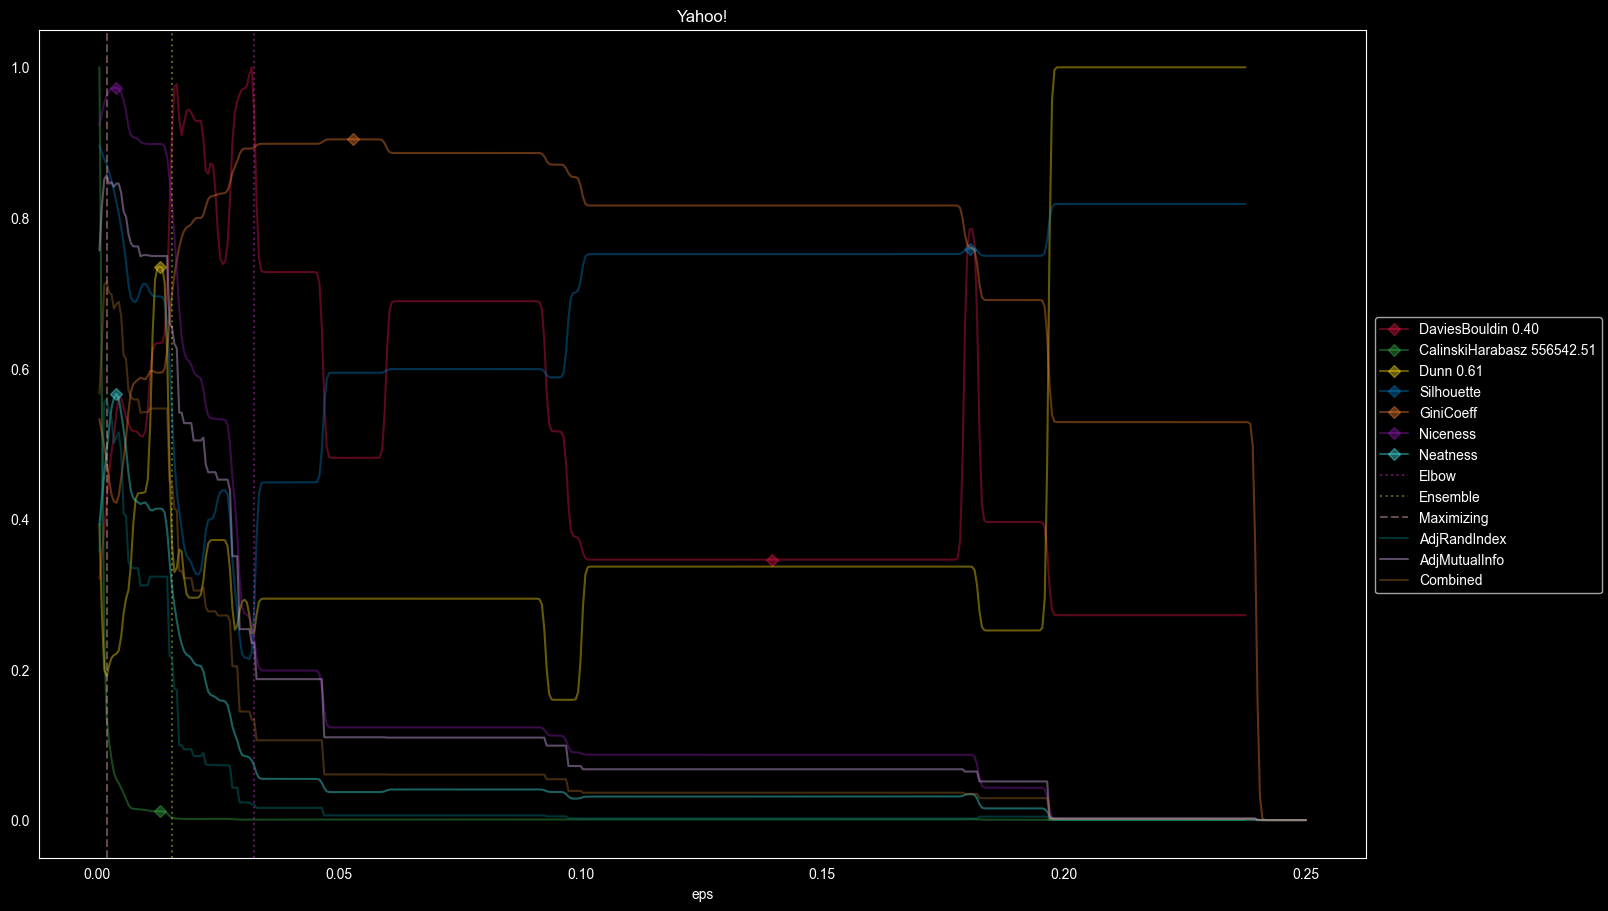

{'Silhouette': 0.8798592176050167, 'Niceness': 0.9617987322603135, 'GiniCoeff': 0.4743107668307378, 'Neatness': 0.49015024749613695, 'sample': {'eps': 0.002, 'min_samples': 1}, 'counts_dict': {1: 9, 2: 7, 3: 7, 4: 2, 5: 4, 6: 3, 7: 2, 8: 3, 9: 1, 10: 5, 11: 3, 12: 2, 13: 2, 14: 1, 15: 1, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 4, 23: 3, 24: 4, 25: 13, 50: 1, 101: 1}, 'DaviesBouldin': 0.15952219860515604, 'CalinskiHarabasz': 76472.42770281418, 'Dunn': 0.10834815652863974, 'AdjRandIndex': 0.5592935600137117, 'AdjMutualInfo': 0.8569323901783884, 'Combined': 0.7153900319458764}
Name
Morgan Stanley                            147
The Goldman Sachs Group, Inc.             125
Wells Fargo & Company                     118
Bank of America Corporation                99
U.S. Bancorp                               55
Royal Bank of Canada                       49
Citigroup Inc.                             45
The Charles Schwab Corporation             37
American Express Company                

In [3]:
yahoo_ = optimize_dbscan(yahoo.drop("Name", axis=1), "Yahoo!", yahoo.Name,  # weight_num=[5, 18, 76],
                         factor=0.25, n_iter=500, precomputed=True, chunksize=20)

In [4]:
yahoo_[1][1]


,AdjMutualInfo,AdjRandIndex,Combined
Metric,,,
DaviesBouldin,0.067503,0.002042,0.036373
CalinskiHarabasz,0.749246,0.323413,0.546741
Dunn,0.749246,0.323413,0.546741
Silhouette,0.064458,0.002019,0.034765
GiniCoeff,0.109988,0.006257,0.060659
Niceness,0.845659,0.509281,0.685694
Neatness,0.845659,0.509281,0.685694
Elbow,0.235185,0.020865,0.133265
Ensemble,0.654658,0.217042,0.446549


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(yahoo.Name)
X_train, X_test, y_train, y_test = train_test_split(yahoo.drop("Name", axis=1), le.transform(yahoo.Name), random_state=42)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
pd.Series(reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)


0.9997055192565368


PE_ratio                0.764133
market cap              0.184708
Change                  0.050945
_isinferred_PE_ratio    0.000214
dtype: float64